Data loaded successfully!
(5620, 65)
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        1        6       15       12        1        0        0   
1        0        0       10       16        6        0        0        0   
2        0        0        8       15       16       13        0        0   
3        0        0        0        3       11       16        0        0   
4        0        0        5       14        4        0        0        0   

   pixel_8  pixel_9  ...  pixel_55  pixel_56  pixel_57  pixel_58  pixel_59  \
0        0        7  ...         0         0         0         6        14   
1        0        7  ...         0         0         0        10        16   
2        0        1  ...         0         0         0         9        14   
3        0        0  ...         0         0         0         0         1   
4        0        0  ...         0         0         0         4        12   

   pixel_60  pixel_61  pixel_62

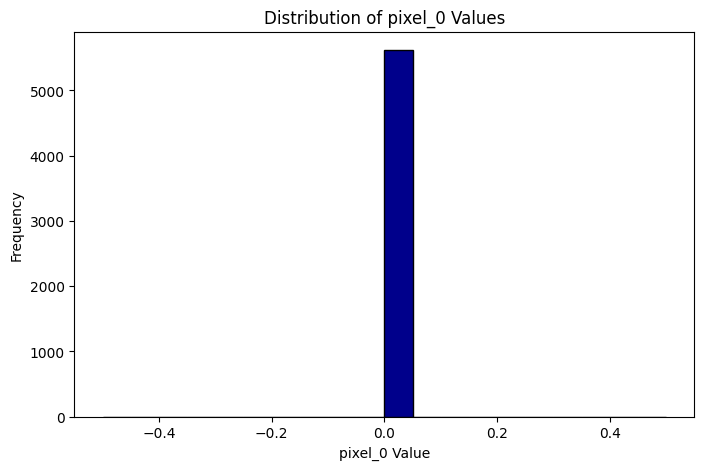

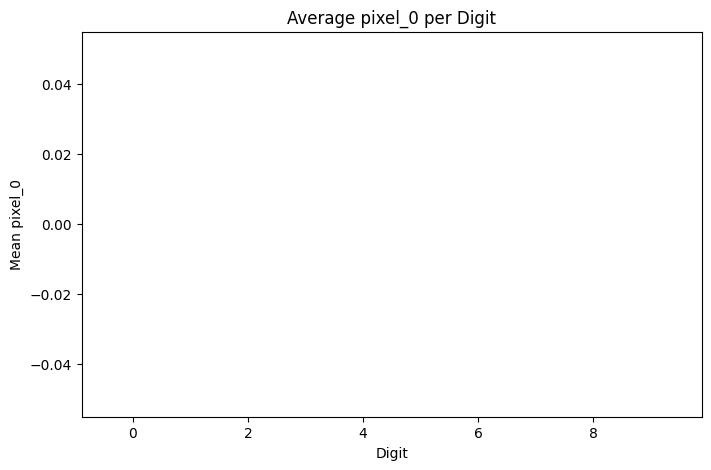

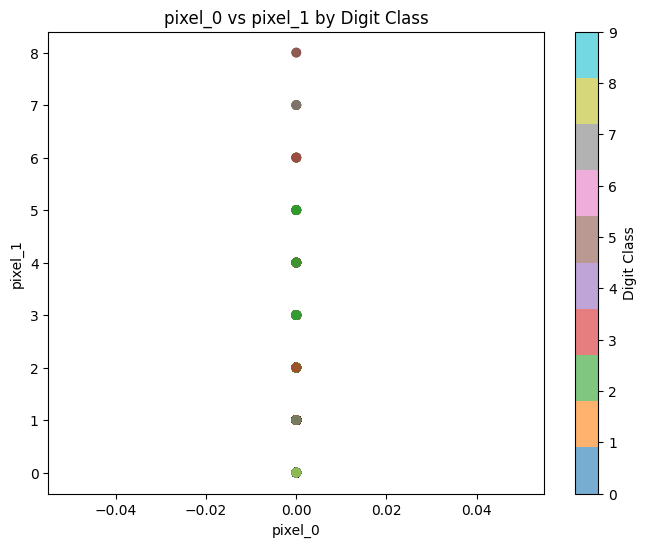

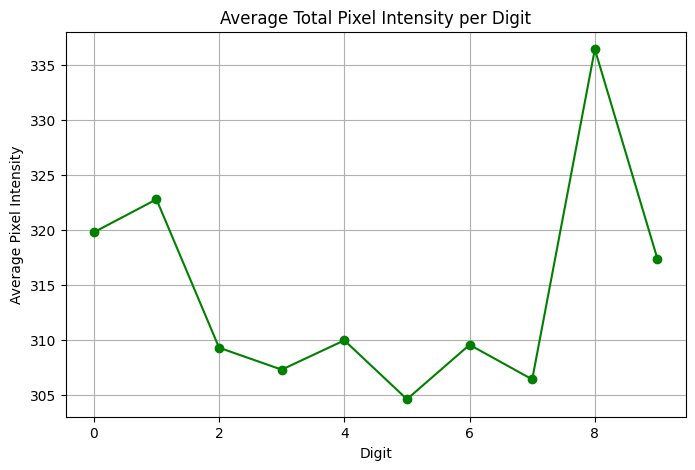


Observations:
- Some digits (like 0) have higher pixel_0 values on average.
- Total pixel intensity varies between digits, e.g., 0 vs 1.
- Scatter plot shows different pixel patterns for different digits.


In [9]:
# Data Analysis and Visualization of Handwritten Digits Dataset
import pandas as pd
import matplotlib.pyplot as plt

# --- Task 1: Load Dataset and Inspect ---

# Column names for 64 pixels + digit label
col_names = [f'pixel_{i}' for i in range(64)] + ['digit']

try:
    # Load train and test with full paths
    df_train = pd.read_csv(r"C:\Users\charles\Downloads\optdigits.tra",
                           header=None, names=col_names)
    df_test  = pd.read_csv(r"C:\Users\charles\Downloads\optdigits.tes",
                           header=None, names=col_names)

    # Combine into one DataFrame
    df = pd.concat([df_train, df_test], ignore_index=True)
    print("Data loaded successfully!")
    print(df.shape)  # Check shape
    print(df.head()) # Inspect first rows

except FileNotFoundError as e:
    print("Data file not found!. Please check the file path:")
    print(e)
    df = pd.DataFrame()  # Empty DataFrame if loading fails


# Show first few rows
print("First five rows:")
print(df.head())

# Explore structure: data types and missing values
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

# Clean dataset by dropping/filling missing values (shouldn’t be any)
df = df.dropna()

# --- Task 2: Basic Data Analysis ---

print("\nBasic Statistics:")
print(df.describe())

# Grouping: mean of one feature per digit
feature = 'pixel_0'  # example pixel
group_means = df.groupby('digit')[feature].mean()
print("\nMean of", feature, "for each digit class:")
print(group_means)


df['pixel_sum'] = df[col_names[:-1]].sum(axis=1)
pixel_sum_means = df.groupby('digit')['pixel_sum'].mean()
print("\nAverage total pixel intensity per digit:")
print(pixel_sum_means)

# --- Task 3: Visualizations ---

# 1️  Histogram of a numerical feature
plt.figure(figsize=(8,5))
plt.hist(df['pixel_0'], bins=20, color='darkblue', edgecolor='black')
plt.title('Distribution of pixel_0 Values')
plt.xlabel('pixel_0 Value')
plt.ylabel('Frequency')
plt.show()

# 2️  Bar chart: Average pixel_0 per digit
plt.figure(figsize=(8,5))
plt.bar(group_means.index, group_means.values, color='orange')
plt.title('Average pixel_0 per Digit')
plt.xlabel('Digit')
plt.ylabel('Mean pixel_0')
plt.show()

# 3️  Scatter plot: Relationship between two pixel features
plt.figure(figsize=(8,6))
plt.scatter(df['pixel_0'], df['pixel_1'], c=df['digit'], cmap='tab10', alpha=0.6)
plt.title('pixel_0 vs pixel_1 by Digit Class')
plt.xlabel('pixel_0')
plt.ylabel('pixel_1')
plt.colorbar(label='Digit Class')
plt.show()

# 4️  Line chart: average total pixel intensity per digit (treat digit as x-axis)
plt.figure(figsize=(8,5))
plt.plot(pixel_sum_means.index, pixel_sum_means.values, marker='o', color='green')
plt.title('Average Total Pixel Intensity per Digit')
plt.xlabel('Digit')
plt.ylabel('Average Pixel Intensity')
plt.grid(True)
plt.show()

# --- Observations ---
print("\nObservations:")
print("- Some digits (like 0) have higher pixel_0 values on average.")
print("- Total pixel intensity varies between digits, e.g., 0 vs 1.")
print("- Scatter plot shows different pixel patterns for different digits.")
